# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle
import joblib

random.seed(42)

rand = np.random.seed(333)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [382]:
print("Это необходимо для воспроизводимости результатов")

Это необходимо для воспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [383]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [384]:
df_train.sample(n=10, random_state=rand)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3472,Mahindra Bolero SLX 2WD,2010,315000,120000,Diesel,Individual,Manual,Second Owner,13.6 kmpl,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.0
4515,Maruti Swift VDI BSIV,2015,484999,30000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
662,Maruti Alto LX,2005,85000,150000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
6521,Mahindra Verito 1.5 D4 BSIV,2015,380000,120000,Diesel,Individual,Manual,Second Owner,21.03 kmpl,1461 CC,65 bhp,160Nm@ 2000rpm,5.0
6040,Ford Figo Diesel EXI,2011,250000,55130,Diesel,Dealer,Manual,Second Owner,20.0 kmpl,1399 CC,68 bhp,160Nm@ 2000rpm,5.0
4854,Maruti Omni MPI STD BSIII 8-STR W/ IMMOBILISER,2008,110000,48676,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,35 bhp,"6.1@ 3,000(kgm@ rpm)",8.0
3395,Ford EcoSport 1.5 TDCi Trend Plus BSIV,2017,700000,60000,Diesel,Individual,Manual,First Owner,22.77 kmpl,1498 CC,98.59 bhp,205Nm@ 1750-3250rpm,5.0
5723,Mahindra TUV 300 T8,2015,500000,120000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0
2547,Maruti SX4 Celebration Diesel,2011,242000,120000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1248 CC,88.8 bhp,200Nm@ 1750rpm,5.0
2947,Maruti Swift AMT VVT VXI,2019,650000,5621,Petrol,Trustmark Dealer,Automatic,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [385]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [386]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [387]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [388]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [389]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [390]:
print("Пропуски есть в столбцах mileage, engine, max_power, torque, seats как в тренировочном, так и в тестовом датасетах")

Пропуски есть в столбцах mileage, engine, max_power, torque, seats как в тренировочном, так и в тестовом датасетах


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [391]:
df = df_train.loc[:, df_train.columns != "selling_price"]
df_dup = df[df.duplicated(keep=False) == True]
df_dup["name"].count()

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [392]:
df_dup

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [393]:
df_train = df_train.drop_duplicates(keep="first", subset=df_train.columns.difference(["selling_price"]))

In [394]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [395]:
df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [396]:
df_train["mileage"] = df_train["mileage"].str.extract('(\d*\.?\d*)').astype(float)
df_train["engine"] = df_train["engine"].str.extract('(\d+)').astype(float)
df_train["max_power"] = df_train["max_power"].str.extract('(\d+\.?\d*)').astype(float)

df_test["mileage"] = df_test["mileage"].str.extract('(\d*\.?\d*)').astype(float)
df_test["engine"] = df_test["engine"].str.extract('(\d+)').astype(float)
df_test["max_power"] = df_test["max_power"].str.extract('(\d+\.?\d*)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/pm/9vsb_r5x7g34qzs2s4s709dm0000gn/T/ipykernel_11659/4290367539.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_train["mileage"] = df_train["mileage"].str.extract('(\d*\.?\d*)').astype(float)
/var/folders/pm/9vsb_r5x7g34qzs2s4s709dm0000gn/T/ipykernel_11659/4290367539.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_train["engine"] = df_train["engine"].str.extract('(\d+)').

In [397]:
df_train = df_train.drop(["torque"], axis=1)
df_test = df_test.drop(["torque"], axis=1)

In [398]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [399]:
df_train[["mileage", "engine", "max_power", "seats"]] = df_train[["mileage", "engine", "max_power", "seats"]].fillna(df_train[["mileage", "engine", "max_power", "seats"]].median())

In [400]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [401]:
df_test[["mileage", "engine", "max_power", "seats"]] = df_test[["mileage", "engine", "max_power", "seats"]].fillna(df_train[["mileage", "engine", "max_power", "seats"]].median())

In [402]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [403]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)

df_test["engine"] = df_test["engine"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

In [404]:
print("Возможно целые числа будут сильно влиять на предсказание модели, так как разброс значений от 2 до 14, и, наверное, после 5-6 мест влияние на цену не будет сильным")

Возможно целые числа будут сильно влиять на предсказание модели, так как разброс значений от 2 до 14, и, наверное, после 5-6 мест влияние на цену не будет сильным


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

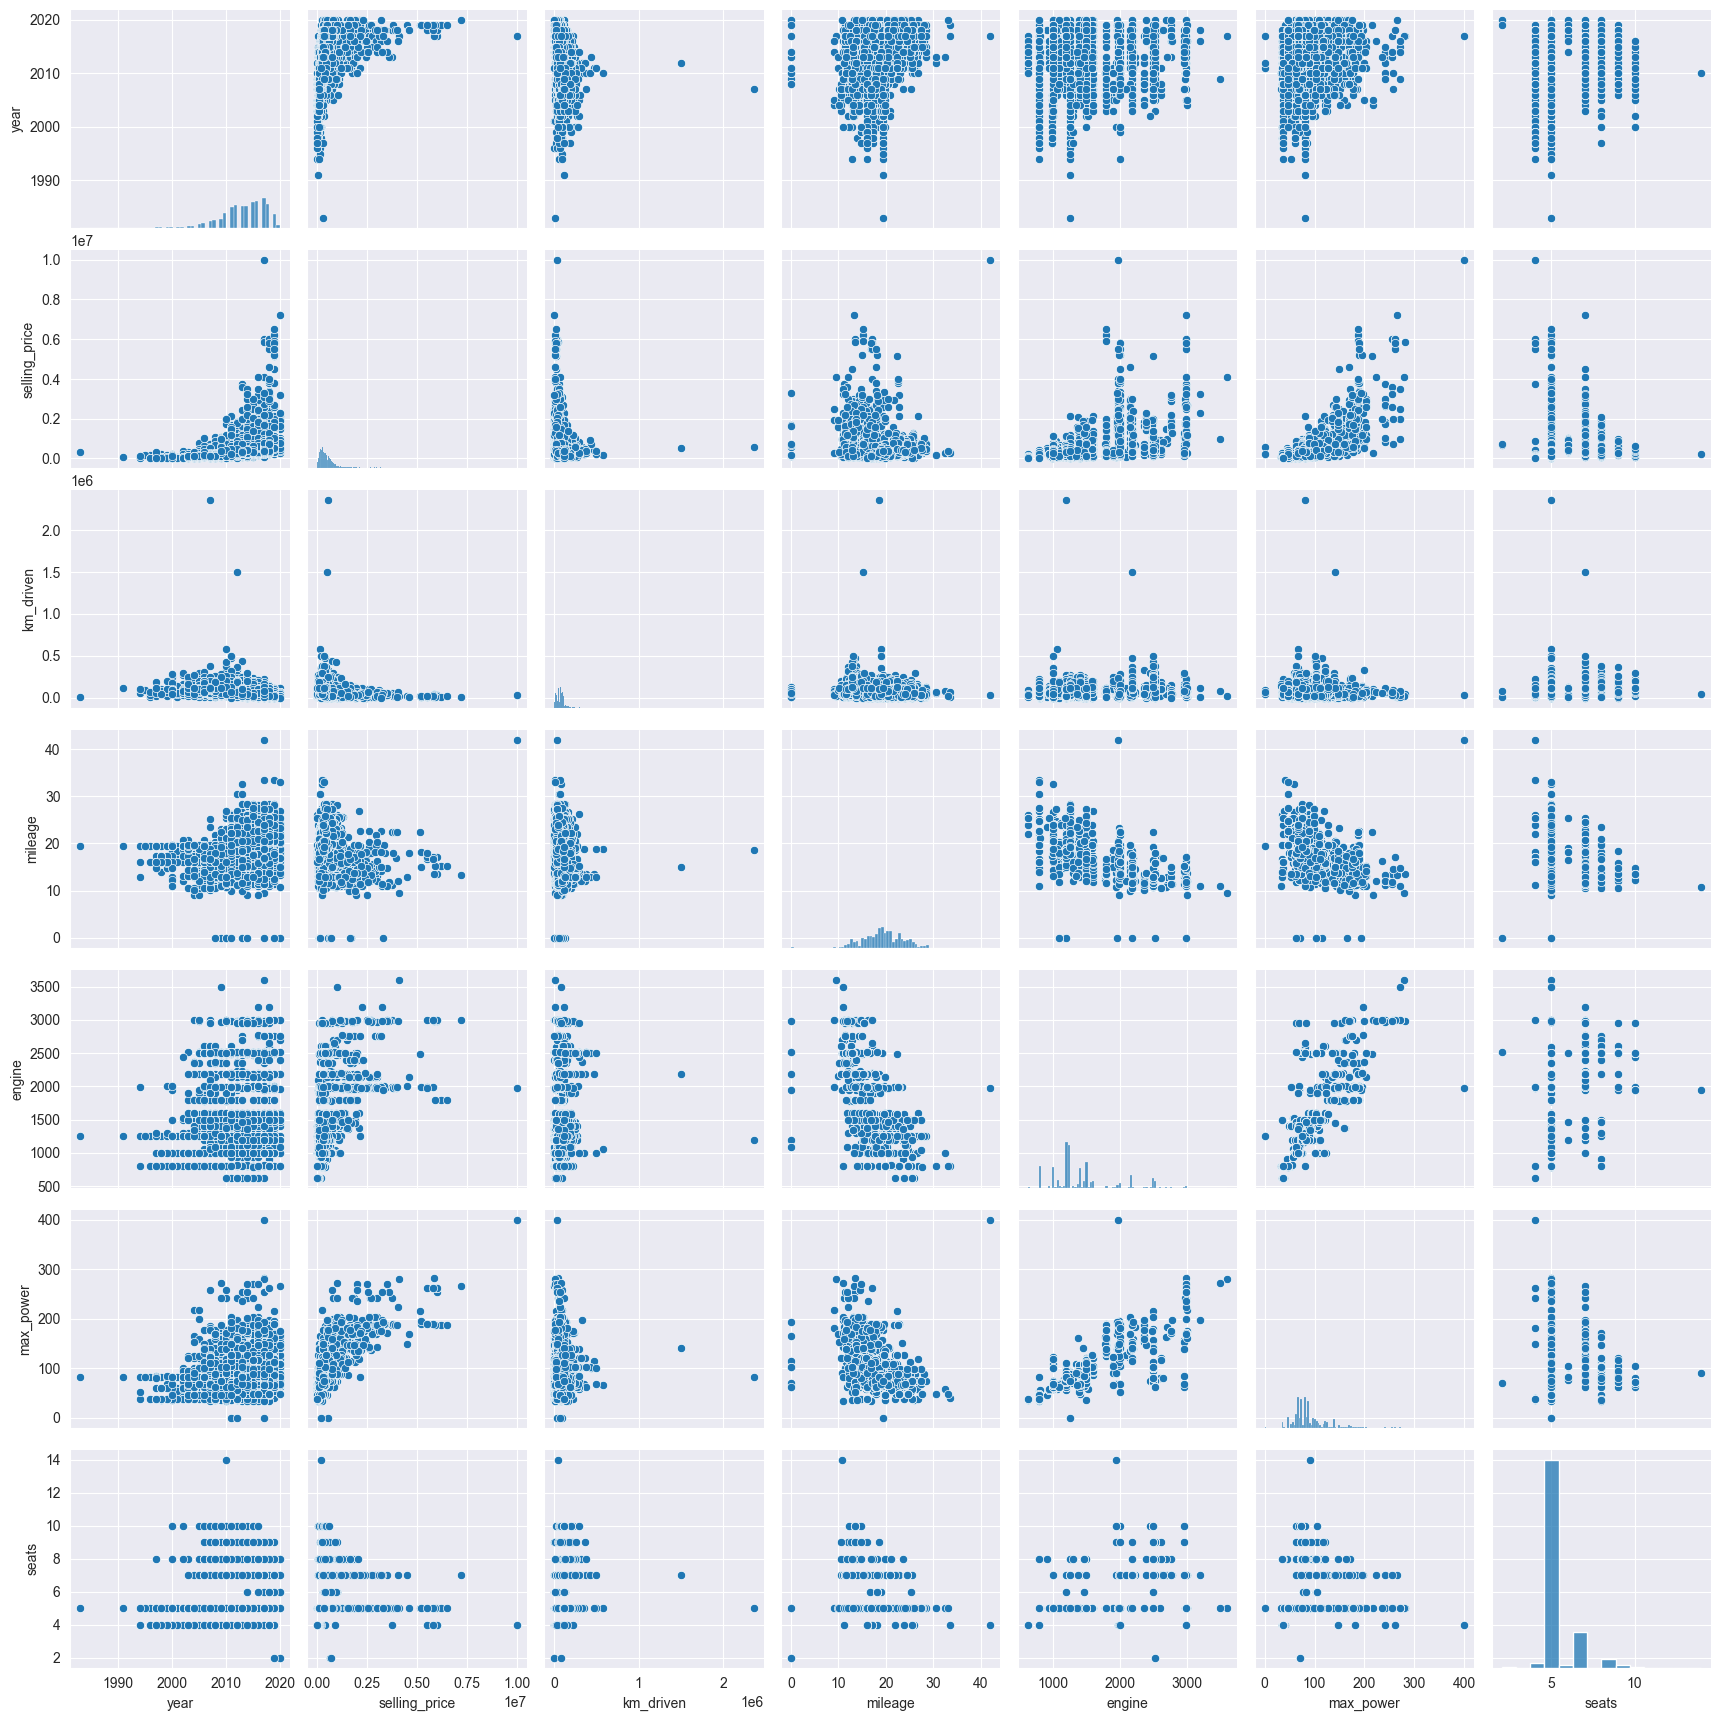

In [27]:
df_num = df_train.select_dtypes(include=np.number)
sns.pairplot(df_num)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [28]:
print("Есть прямо пропорциональная зависимость цены от year, engine and max_power"
      "и обратная зависимость от km_driven and mileage")
print("Четкая корреляция видна у engine and max_power")

Есть прямо пропорциональная зависимость цены от year, engine and max_powerи обратная зависимость от km_driven and mileage
Четкая корреляция видна у engine and max_power


(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

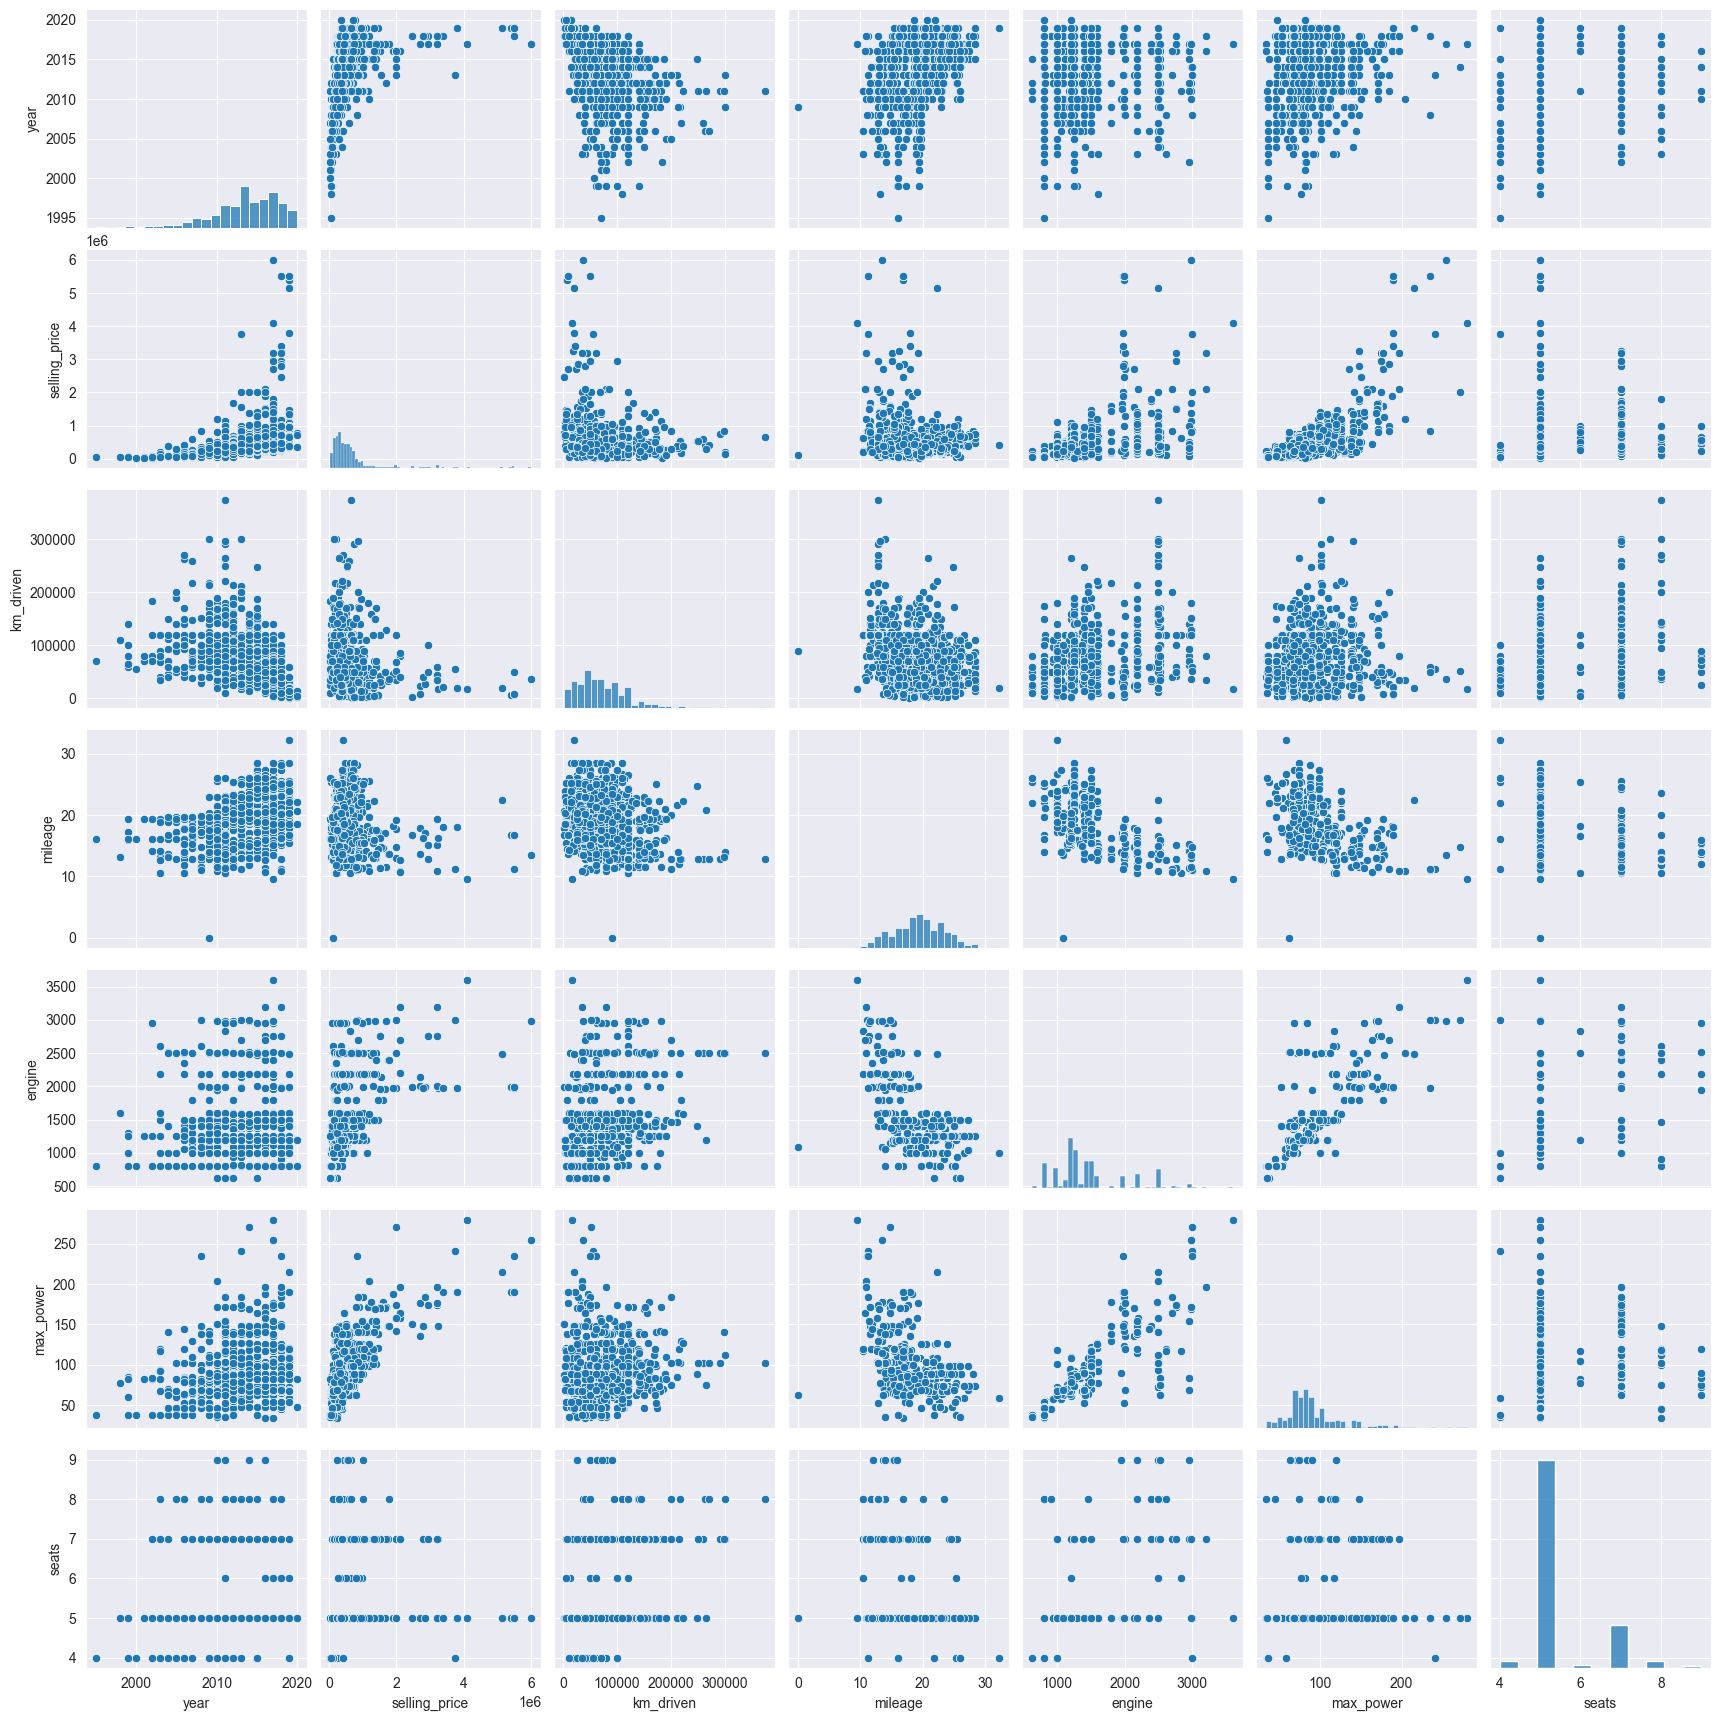

In [29]:
df_num_test = df_test.select_dtypes(include=np.number)
sns.pairplot(df_num_test)

In [30]:
print("Совокупности похожи, но значения в тесте как будто бы более равномерно распределены и покрывают значения 'шире', чем трейн")

Совокупности похожи, но значения в тесте как будто бы более равномерно распределены и покрывают значения 'шире', чем трейн


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

Text(0.5, 1.0, 'Heatmap')

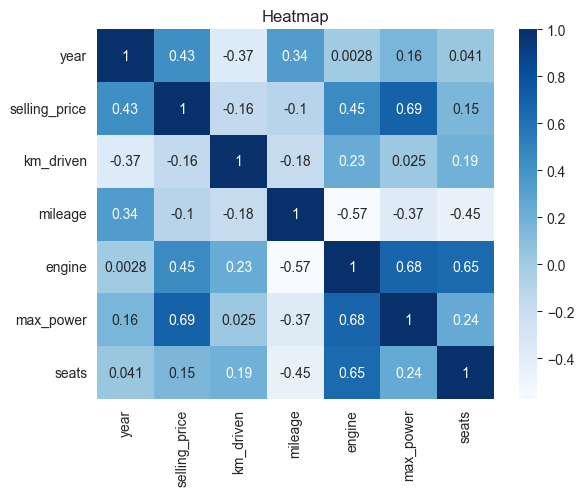

In [108]:
df_num = df_train.select_dtypes(include=np.number)
df_corr = df_num.corr()
sns.heatmap(df_corr, annot=True, cmap="Blues")
plt.title("Heatmap")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [109]:
print("2 признака наименее скоррелированы между собой: engine and year")
print("Наблюдается довольно сильная положительная линейная зависимость между engine and max_power")
print("Можно сказать, что да, так как отрицательная корреляция, но утверждать нельзя, так как машину могли купить и оставить в гараже на несколько лет")

2 признака наименее скоррелированы между собой: engine and year
Наблюдается довольно сильная положительная линейная зависимость между engine and max_power
Можно сказать, что да, так как отрицательная корреляция, но утверждать нельзя, так как машину могли купить и оставить в гараже на несколько лет


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0.5, 1.0, 'Scatterplot')

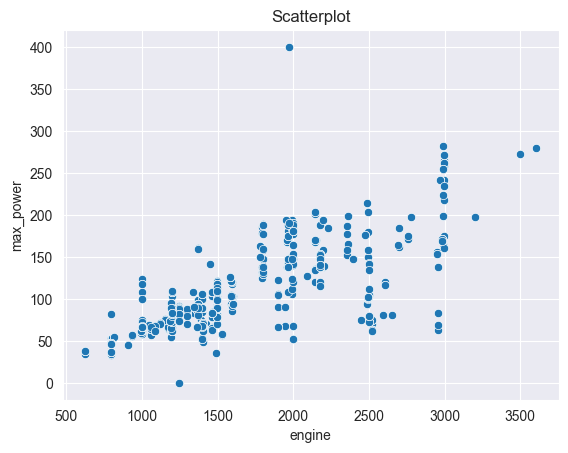

In [110]:
sns.scatterplot(
    x="engine", 
    y='max_power', 
    data=df_train)
plt.xlabel(
    'engine')
plt.ylabel(
    'max_power')
plt.title("Scatterplot")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Text(0.5, 1.0, 'Scatterplot')

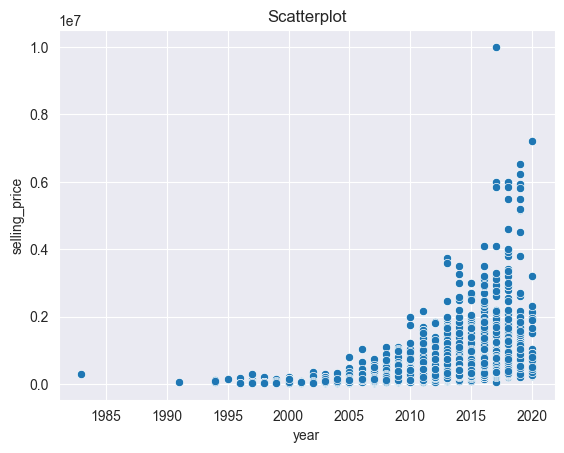

In [112]:
sns.scatterplot(
    x="year", 
    y='selling_price', 
    data=df_train)
plt.xlabel(
    'year')
plt.ylabel(
    'selling_price')
plt.title("Scatterplot")

In [113]:
print("Прослеживается четкая зависимость цены от возраста машины")

Прослеживается четкая зависимость цены от возраста машины


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [406]:
X_train = df_train.drop(["selling_price", "name", "fuel", "seller_type", "transmission", "owner"], axis=1)
y_train = df_train["selling_price"]

In [407]:
assert X_train.shape == (5840, 6)

In [408]:
X_train

,year,km_driven,mileage,engine,max_power,seats
0,2014,145500,23.40,1248,74.00,5
1,2014,120000,21.14,1498,103.52,5
2,2010,127000,23.00,1396,90.00,5
3,2007,120000,16.10,1298,88.20,5
4,2017,45000,20.14,1197,81.86,5
...,...,...,...,...,...,...
6992,2008,191000,17.92,1086,62.10,5
6993,2013,50000,18.90,998,67.10,5
6994,2013,110000,18.50,1197,82.85,5
6995,2007,119000,16.80,1493,110.00,5


In [409]:
y_test = df_test["selling_price"]
X_test = df_test.drop(["selling_price", "name", "fuel", "seller_type", "transmission", "owner"], axis=1)

In [410]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [411]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, lr.predict(X_train)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, lr.predict(X_train)))
print('R2_test = ', R2_test)

MSE_train =  116874153930.02858
MSE_test =  233298779730.45868
R2_train =  0.5922591702157316
R2_test =  0.5941419794788363


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [412]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)
y_pred = lr_2.predict(X_test)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, lr_2.predict(X_train)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, lr_2.predict(X_train)))
print('R2_test = ', R2_test)

MSE_train =  116874153930.0289
MSE_test =  233298779730.44962
R2_train =  0.5922591702157305
R2_test =  0.5941419794788521


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [413]:
coef = lr.coef_
for i in range(0,6):
    print(abs(coef[i]))

print("Самым информативным является признак year")

37304.62782737032
0.7351717030242368
7234.467865638186
125.97985406771345
10203.246717928934
23628.30230833547
Самым информативным является признак year


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [414]:
from sklearn.linear_model import Lasso

clf_l = Lasso()
clf_l.fit(X_train, y_train)
y_pred = clf_l.predict(X_test)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, clf_l.predict(X_train)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, clf_l.predict(X_train)))
print('R2_test = ', R2_test)
coef_l = clf_l.coef_
print('Lasso coefs')
for i in range(0,6):
    print(abs(coef_l[i]))

MSE_train =  116874153940.1429
MSE_test =  233299450599.16934
R2_train =  0.5922591701804456
R2_test =  0.5941408124026635
Lasso coefs
152772.39021419577
44157.68985794259
28832.043395883888
61173.66240922139
322808.2369194693
23206.255649080187


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [415]:
print("Нет, нужно подобрать коэффициент регуляризации")

Нет, нужно подобрать коэффициент регуляризации


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [416]:
from sklearn.model_selection import GridSearchCV

clf_l = Lasso()

parameters = {'alpha': [1,5,20,40,50,1000, 5000, 10000, 20000, 40000, 50000], "max_iter": [100,1000,10000,100000,10000000,100000000], "tol": [0.01,0.001,0.0001,0.00001,0.0000001]}
grid_search = GridSearchCV(estimator = clf_l,  
                           param_grid = parameters,
                           cv = 10)


clf = grid_search.fit(X_train, y_train)  
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 20000, 'max_iter': 100, 'tol': 1e-07}
accuracy : 0.5744894373004208


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [417]:
clf_l = Lasso(alpha=20000, max_iter=100, tol=0.0000001)
clf_l.fit(X_train, y_train)
y_pred = clf_l.predict(X_test)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, clf_l.predict(X_train)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, clf_l.predict(X_train)))
print('R2_test = ', R2_test)
coef_l = clf_l.coef_
print('Lasso coefs')
for i in range(0,6):
    print(abs(coef_l[i]))

MSE_train =  118904956891.88197
MSE_test =  246326689667.63043
R2_train =  0.585174273709955
R2_test =  0.5714779872164789
Lasso coefs
149551.20848936075
21442.835144713135
0.0
1458.441330604286
326998.52046017913
0.0


In [418]:
print("Лучший коэффициент = 20000, занулились веса у признаков: mileage, seats")

Лучший коэффициент = 20000, занулились веса у признаков: mileage, seats


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [419]:
from sklearn.linear_model import ElasticNet

elm = ElasticNet()
parameters = {'alpha': [1,5,20,40,50,1000, 5000, 10000, 20000, 40000, 50000], "max_iter": [100,1000,10000,100000,10000000,100000000], "tol": [0.01,0.001,0.0001,0.00001,0.0000001]}
grid_search = GridSearchCV(estimator = elm,  
                           param_grid = parameters,
                           cv = 10)


elm_grd = grid_search.fit(X_train, y_train)  
print("tuned hpyerparameters :(best parameters) ",elm_grd.best_params_)
print("accuracy :",elm_grd.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 1, 'max_iter': 100, 'tol': 0.01}
accuracy : 0.5553826794127662


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [420]:
elm = ElasticNet(alpha=1, max_iter=100, tol=0.01)
elm.fit(X_train, y_train)
y_pred = elm.predict(X_test)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, elm.predict(X_train)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, elm.predict(X_train)))
print('R2_test = ', R2_test)
coef_l = elm.coef_
print('ElasticNet coefs')
for i in range(0,6):
    print(abs(coef_l[i]))

MSE_train =  130399287088.23618
MSE_test =  290874657032.2947
R2_train =  0.5450738103099655
R2_test =  0.49398015429273656
ElasticNet coefs
118843.32402473531
43114.85486121901
8994.936431126776
82244.39408679039
202107.34613239323
10156.753965348198


In [421]:
print("Дучше всего подходит коэффициент регуляризации = 1")

Дучше всего подходит коэффициент регуляризации = 1


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [463]:
X_train_cat = df_train.drop(["selling_price", "name"], axis=1)
X_test_cat = df_test.drop(["selling_price", "name"], axis=1)

In [464]:
assert X_train_cat.shape == (5840, 10)

In [465]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [466]:
X_train_cat.replace(" ", "_", regex=True, inplace=True)
X_train_cat.replace("&_", "", regex=True, inplace=True)
X_test_cat.replace(" ", "_", regex=True, inplace=True)
X_test_cat.replace("&_", "", regex=True, inplace=True)

In [467]:
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
6992,2008,191000,Petrol,Individual,Manual,First_Owner,17.92,1086,62.10,5
6993,2013,50000,Petrol,Individual,Manual,Second_Owner,18.90,998,67.10,5
6994,2013,110000,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,5
6995,2007,119000,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,5


In [468]:
X_test_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2010,168000,Diesel,Individual,Manual,First_Owner,14.00,2498,112.00,7
1,2017,25000,Diesel,Individual,Manual,First_Owner,21.50,1497,108.50,5
2,2007,218463,Petrol,Individual,Automatic,First_Owner,12.90,1799,130.00,5
3,2015,173000,Diesel,Individual,Manual,First_Owner,25.10,1498,98.60,5
4,2011,70000,Petrol,Individual,Manual,Second_Owner,16.50,1172,65.00,5
...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,Petrol,Individual,Manual,Second_Owner,19.81,1086,68.05,5
996,2017,50000,Petrol,Individual,Manual,Second_Owner,18.60,1197,81.83,5
997,2009,40000,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,5
998,2012,25000,Petrol,Individual,Manual,First_Owner,20.36,1197,78.90,5


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [469]:
X_train_cat = pd.get_dummies(data=X_train_cat, columns=["fuel", "seller_type", "transmission", "owner", "seats"], drop_first=True, prefix_sep="_", dtype=int)
X_test_cat = pd.get_dummies(data=X_test_cat, columns=["fuel", "seller_type", "transmission", "owner", "seats"], prefix_sep="_", dtype=int)

In [470]:
X_train_cat

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,...,owner_Test_Drive_Car,owner_Third_Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,2008,191000,17.92,1086,62.10,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6993,2013,50000,18.90,998,67.10,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6994,2013,110000,18.50,1197,82.85,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6995,2007,119000,16.80,1493,110.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [471]:
X_test_cat

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Fourth_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2010,168000,14.00,2498,112.00,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2017,25000,21.50,1497,108.50,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2007,218463,12.90,1799,130.00,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2015,173000,25.10,1498,98.60,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2011,70000,16.50,1172,65.00,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
996,2017,50000,18.60,1197,81.83,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
997,2009,40000,23.00,1396,90.00,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,2012,25000,20.36,1197,78.90,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [472]:
sc = StandardScaler()
X_train_cat[["year", "km_driven", "mileage", "engine", "max_power"]] = sc.fit_transform(X_train_cat[["year", "km_driven", "mileage", "engine", "max_power"]])

In [473]:
X_test_cat[["year", "km_driven", "mileage", "engine", "max_power"]] = sc.transform(X_test_cat[["year", "km_driven", "mileage", "engine", "max_power"]])

In [474]:
X_train_cat

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark_Dealer,...,owner_Test_Drive_Car,owner_Third_Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.139570,0.766619,0.428830,0.141162,0.493513,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6993,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6994,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6995,-1.569719,0.749971,-0.660081,0.130865,0.698332,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [475]:
X_test_cat

,year,km_driven,mileage,engine,max_power,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,owner_Fourth_Above_Owner,owner_Second_Owner,owner_Test_Drive_Car,owner_Third_Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,-0.837167,1.565740,-1.362605,2.200379,0.761548,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.872122,-0.814974,0.519155,0.139102,0.650920,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.569719,2.405866,-1.638596,0.760986,1.330489,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.383754,1.648982,1.422399,0.141162,0.338003,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.592983,-0.065798,-0.735352,-0.530144,-0.724021,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.325535,0.433652,0.095132,-0.707236,-0.627617,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
996,0.872122,-0.398765,-0.208459,-0.478663,-0.192061,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
997,-1.081351,-0.565249,0.895506,-0.068879,0.066175,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
998,-0.348799,-0.814974,0.233127,-0.478663,-0.284672,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


s(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [458]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

lr_r = Ridge()
parameters = {'alpha': [1,2,3,4,5,20,40,50,100, 200, 300, 400, 500, 1000, 2000, 5000, 10000, 20000, 40000, 50000]}
grid_search = GridSearchCV(estimator = lr_r,  
                           param_grid = parameters,
                           scoring="r2",
                           cv = 10)


grd = grid_search.fit(X_train_cat, y_train)  
print("tuned hpyerparameters :(best parameters) ",grd.best_params_)
print("r2 :",grd.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 5}
r2 : 0.6219653521464891


In [495]:
lr_r = Ridge(alpha=5)
lr_r.fit(X_train_cat, y_train)
X_test_cat[['seats_10', 'seats_14']] = 0
X_test_cat = X_test_cat[lr_r.feature_names_in_]
y_pred = lr_r.predict(X_test_cat)
MSE_test = MSE(y_test, y_pred)
R2_test = r2_score(y_test, y_pred)
print('MSE_train = ', MSE(y_train, lr_r.predict(X_train_cat)))
print('MSE_test = ', MSE_test)
print('R2_train = ', r2_score(y_train, lr_r.predict(X_train_cat)))
print('R2_test = ', R2_test)
print(f"MSE_train изменилось на {((97701937318.30687 / 130399287088.23618) - 1 ) * 100} %")
print(f"R2_train изменилось на {((0.6591456053016898 / 0.5450738103099655) - 1 ) * 100} %")

dct = {"coefs": lr_r.coef_}

with open("model.pickle", "wb") as file:
    pickle.dump(dct, file)

MSE_train =  97701937318.30687
MSE_test =  205162096986.13327
R2_train =  0.6591456053016898
R2_test =  0.6430899352968538
MSE_train изменилось на -25.074791818305165 %
R2_train изменилось на 20.927770300843363 %


In [500]:
existing_data = joblib.load("model.pickle")
existing_data["scaling"] = sc.scale_
existing_data["alpha"] = 5
with open("model.pickle", "wb") as file:
    pickle.dump(existing_data, file)

print(joblib.load("model.pickle"))

{'coefs': array([ 148562.58145298,  -30274.86286615,   32901.03287606,
         39642.22480531,  286671.22483554,   26746.2111186 ,
        136869.27133704,  -29801.96924614, -109831.07096024,
       -111759.80387008, -291205.97283295,  -38854.49767677,
        -53547.56875646, 1458127.0542289 ,  -37012.14840848,
        470421.16460737,  -92257.66891215, -164037.19174478,
        -86753.50037127,  -46459.57723258,  -51648.08729075,
        -22421.99033438,  -41987.38231596]), 'scaling': array([4.09527128e+00, 6.00659932e+04, 3.98563188e+00, 4.85621251e+02,
       3.16377093e+01]), 'alpha': 5}


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [481]:
# your code here

5840

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [483]:
def business_metrics(y_true, y_pred) -> float:
    df_metric = pd.DataFrame(columns=["real", "predicted", "perc"])
    df_metric["real"] = y_true
    df_metric["predicted"] = y_pred
    df_metric["perc"] = (abs(df_metric["real"] - df_metric["predicted"]))/(df_metric["real"]) * 100
    df_metric_10 = df_metric[df_metric["perc"] <= 10]
    part = df_metric_10.shape[0] / df_metric.shape[0]
    
    return part
    

business_metrics(y_test, y_pred)

0.247

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [147]:
import pandas as pd
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import StreamingResponse
from pydantic import BaseModel
from typing import List
import io
from model import lr_r, sc


app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]

class Schema(BaseModel):
    year: float
    km_driven: float
    mileage: float
    engine: float
    max_power: float
    fuel_Diesel: int = 0
    fuel_LPG: int = 0
    fuel_Petrol: int = 0
    seller_type_Individual: int = 0
    seller_type_Trustmark_Dealer: int = 0
    transmission_Manual: int = 0
    owner_Fourth_Above_Owner: int = 0
    owner_Second_Owner: int = 0
    owner_Test_Drive_Car: int = 0
    owner_Third_Owner: int = 0
    seats_4: int = 0
    seats_5: int = 0
    seats_6: int = 0
    seats_7: int = 0
    seats_8: int = 0
    seats_9: int = 0
    seats_10: int = 0
    seats_14: int = 0


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    car = item.model_dump()
    car_instance = Item(**car)
    data = car_instance.model_dump()
    df = pd.DataFrame([data])

    df["mileage"] = df["mileage"].str.extract('(\d*\.?\d*)').astype(float)
    df["engine"] = df["engine"].str.extract('(\d+)').astype(float)
    df["max_power"] = df["max_power"].str.extract('(\d+\.?\d*)').astype(float)

    df = df.drop(["torque"], axis=1)

    df[["mileage", "engine", "max_power", "seats"]] = df[
        ["mileage", "engine", "max_power", "seats"]].fillna(
        df[["mileage", "engine", "max_power", "seats"]].median())

    df["engine"] = df["engine"].astype(int)
    df["seats"] = df["seats"].astype(int)

    df.replace(" ", "_", regex=True, inplace=True)
    df.replace("&_", "", regex=True, inplace=True)

    df = df.drop(["selling_price", "name"], axis=1)
    df = pd.get_dummies(data=df, columns=["fuel", "seller_type", "transmission", "owner", "seats"], prefix_sep="_", dtype=int)

    df[["year", "km_driven", "mileage", "engine", "max_power"]] = sc.transform(df[["year", "km_driven", "mileage", "engine", "max_power"]])

    car = Schema(**df)
    data = car.model_dump()
    df = pd.DataFrame([data])

    predict = lr_r.predict(df)

    return predict


@app.post("/predict_items")
def predict_items(file: UploadFile = File(...)) -> StreamingResponse:
    df = pd.read_csv(file.file)

    df_with_name = df.drop(["selling_price"], axis=1)

    df["mileage"] = df["mileage"].str.extract('(\d*\.?\d*)').astype(float)
    df["engine"] = df["engine"].str.extract('(\d+)').astype(float)
    df["max_power"] = df["max_power"].str.extract('(\d+\.?\d*)').astype(float)

    df = df.drop(["torque"], axis=1)

    df[["mileage", "engine", "max_power", "seats"]] = df[
        ["mileage", "engine", "max_power", "seats"]].fillna(
        df[["mileage", "engine", "max_power", "seats"]].median())

    df["engine"] = df["engine"].astype(int)
    df["seats"] = df["seats"].astype(int)

    df.replace(" ", "_", regex=True, inplace=True)
    df.replace("&_", "", regex=True, inplace=True)

    df = df.drop(["selling_price", "name"], axis=1)

    df = pd.get_dummies(data=df, columns=["fuel", "seller_type", "transmission", "owner", "seats"],
                        prefix_sep="_",
                        dtype=int)

    df[["year", "km_driven", "mileage", "engine", "max_power"]] = sc.transform(
        df[["year", "km_driven", "mileage", "engine", "max_power"]])

    df[['seats_10', 'seats_14']] = 0
    df = df[lr_r.feature_names_in_]
    predictions = lr_r.predict(df)
    pred_df = pd.DataFrame({"price_predicted": predictions})

    df_with_predictions = pd.concat([df_with_name, pred_df], axis=1)

    csv = df_with_predictions.to_csv(index=False)
    file_like = io.BytesIO(csv.encode())

    # Return the CSV file as a streaming response
    return StreamingResponse(file_like, media_type="text/csv",
                             headers={"Content-Disposition": "attachment; filename=predictions.csv"})



Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link